<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-David-Nicolas364/blob/main/Sep30/Ejercicio_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
def tetha_prop(tet_in1,tet_in2, sig):
  tet_p=np.zeros(2)
  tet_p[0]= np.random.normal(tet_in1,sig)
  tet_p[1]= np.random.normal(tet_in2,sig)
  return tet_p

In [3]:
def model(x,tetha):
  for i in range(len(tetha)):
    f=tetha[i]*x**i
  return f

def likelihood(y,x,tetha):
  f=model(x,tetha)
  for i in range(len(np.array(y))):
    R=(y[i]-f[i])**2
    Ll=np.sum(R)
  return Ll

def prior(Tet_min0,Tet_min1,Tet_max0, Tet_max1,tet_prop):
  if Tet_max0 > tet_prop[0]  > Tet_min0 and Tet_max1 > tet_prop[1]  > Tet_min1:
    LPrior=0
  else:
    LPrior=-math.inf
  return LPrior

In [17]:
def Post(prior, likelihood):
  Post = likelihood + prior
  return Post

In [41]:
def Eval(N,y,x,tet_ini,sig,T_min0, T_max0, T_min1, T_max1):
  Tet_accept=[0,0]
  Tet_acc = np.array(Tet_accept)
  for i in range(N):
    Prop = tetha_prop(tet_ini[0],tet_ini[1],sig)
    if Post(prior(T_min0,T_min1,T_max0,T_max1,Prop),likelihood(y,x,Prop)) > Post(prior(T_min0,T_min1,T_max0,T_max1,tet_ini),likelihood(y,x,tet_ini)):
      Tet_acc = np.vstack((Tet_acc,Prop))
      tet_ini= Prop
    else:
      ptest=np.random.uniform(0,1)
      if Post(prior(T_min0,T_min1,T_max0,T_max1,Prop),likelihood(y,x,Prop))-Post(prior(T_min0,T_min1,T_max0,T_max1,tet_ini),likelihood(y,x,tet_ini)) > np.log(ptest):
        Tet_acc= np.vstack(Tet_acc,Prop)
        tet_ini= Prop
  return Tet_acc

In [21]:
N=100


In [22]:
np.random.uniform(0,1)

0.6920169119128504

In [23]:
data = np.loadtxt("olympic100m_men.txt",delimiter=',').T

In [11]:
x=data[0]
y=data[1]

In [12]:
tet_ini=np.array([0,0])
sig=0.1
T_min0, T_max0= -5,5
T_min1, T_max1= -5,5

In [43]:
Tethas = Eval(N,y,x,tet_ini,sig,T_min0, T_max0, T_min1, T_max1)

In [54]:
Graf = Tethas.T

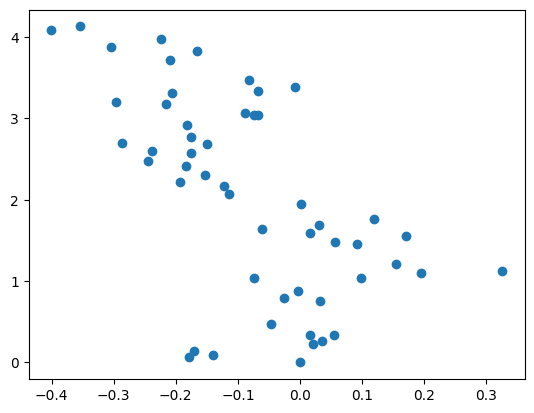

In [57]:
plt.scatter(Graf[0],Graf[1])